In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../Datasets\air-comp.csv
../Datasets\IOT-temp.csv


In [3]:
data = pd.read_csv('../Datasets/air-comp.csv')

In [4]:
#Data Overview

# Displaying the first few rows of the dataset
data_overview = data.head()

# Getting the shape of the dataset
data_shape = data.shape

# Checking for missing values
missing_values = data.isnull().sum()

# Checking data types
data_types = data.dtypes

data_overview, data_shape, missing_values, data_types

(   id  rpm  motor_power     torque  outlet_pressure_bar    air_flow  \
 0   1  499  1405.842858  27.511708                1.000  308.289879   
 1   2  513  1457.370092  31.030115                1.081  307.833736   
 2   3  495  1582.249959  33.484653                1.369  307.377593   
 3   4  480  1712.466820  36.394475                1.691  306.975248   
 4   5  498  1766.035170  38.249154                1.731  306.832132   
 
     noise_db  outlet_temp  wpump_outlet_press  water_inlet_temp  ...  \
 0  40.840517    78.554715            2.960632         43.166392  ...   
 1  40.484226    76.902822            2.536711         47.342143  ...   
 2  40.918572    77.547021            2.112789         49.306593  ...   
 3  40.450953    80.059949            2.087534         46.886933  ...   
 4  41.233739    79.130424            2.338877         50.498100  ...   
 
       gaccy     gaccz     haccx     haccy     haccz  bearings  wpump  \
 0  0.383773  2.649801  1.213344  1.409218  2.962484 

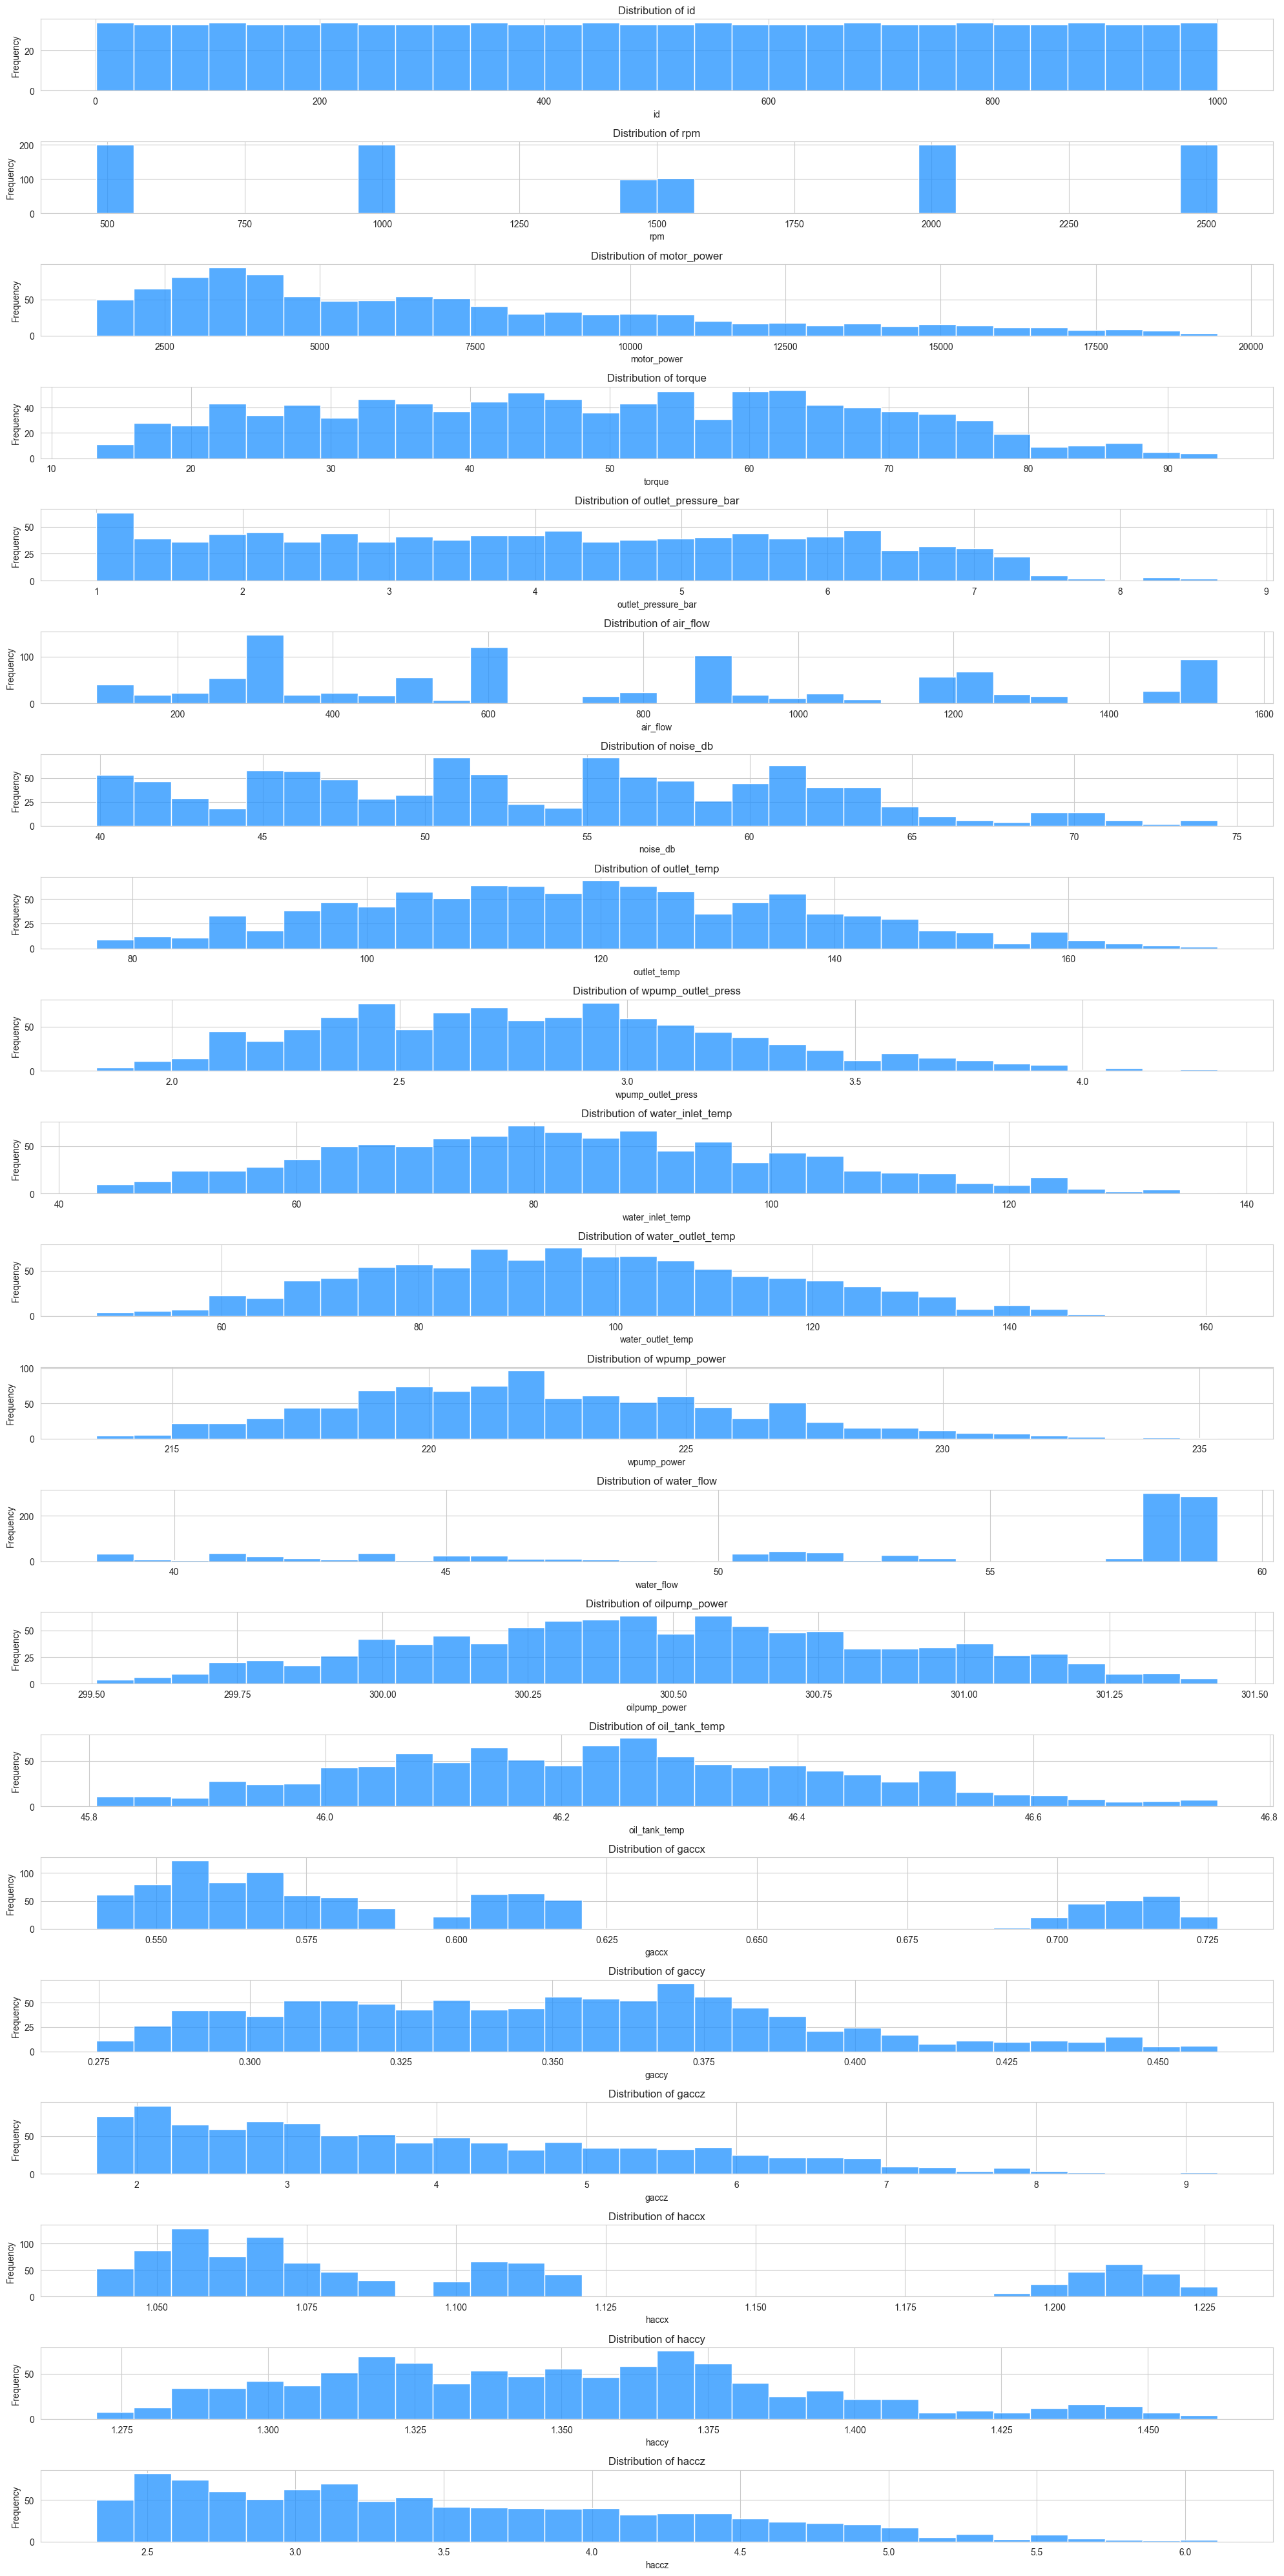

In [5]:
# Distribution
# Setting the style for the plots
sns.set_style('whitegrid')

# Filtering out numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 40))

# Plotting histograms for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.histplot(data[col], color='dodgerblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23264\2736008408.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette=['dodgerblue', 'red'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23264\2736008408.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette=['dodgerblue', 'red'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23264\2736008408.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette=['dodgerblue', 'red'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23264\2736008408.py:12: Fut

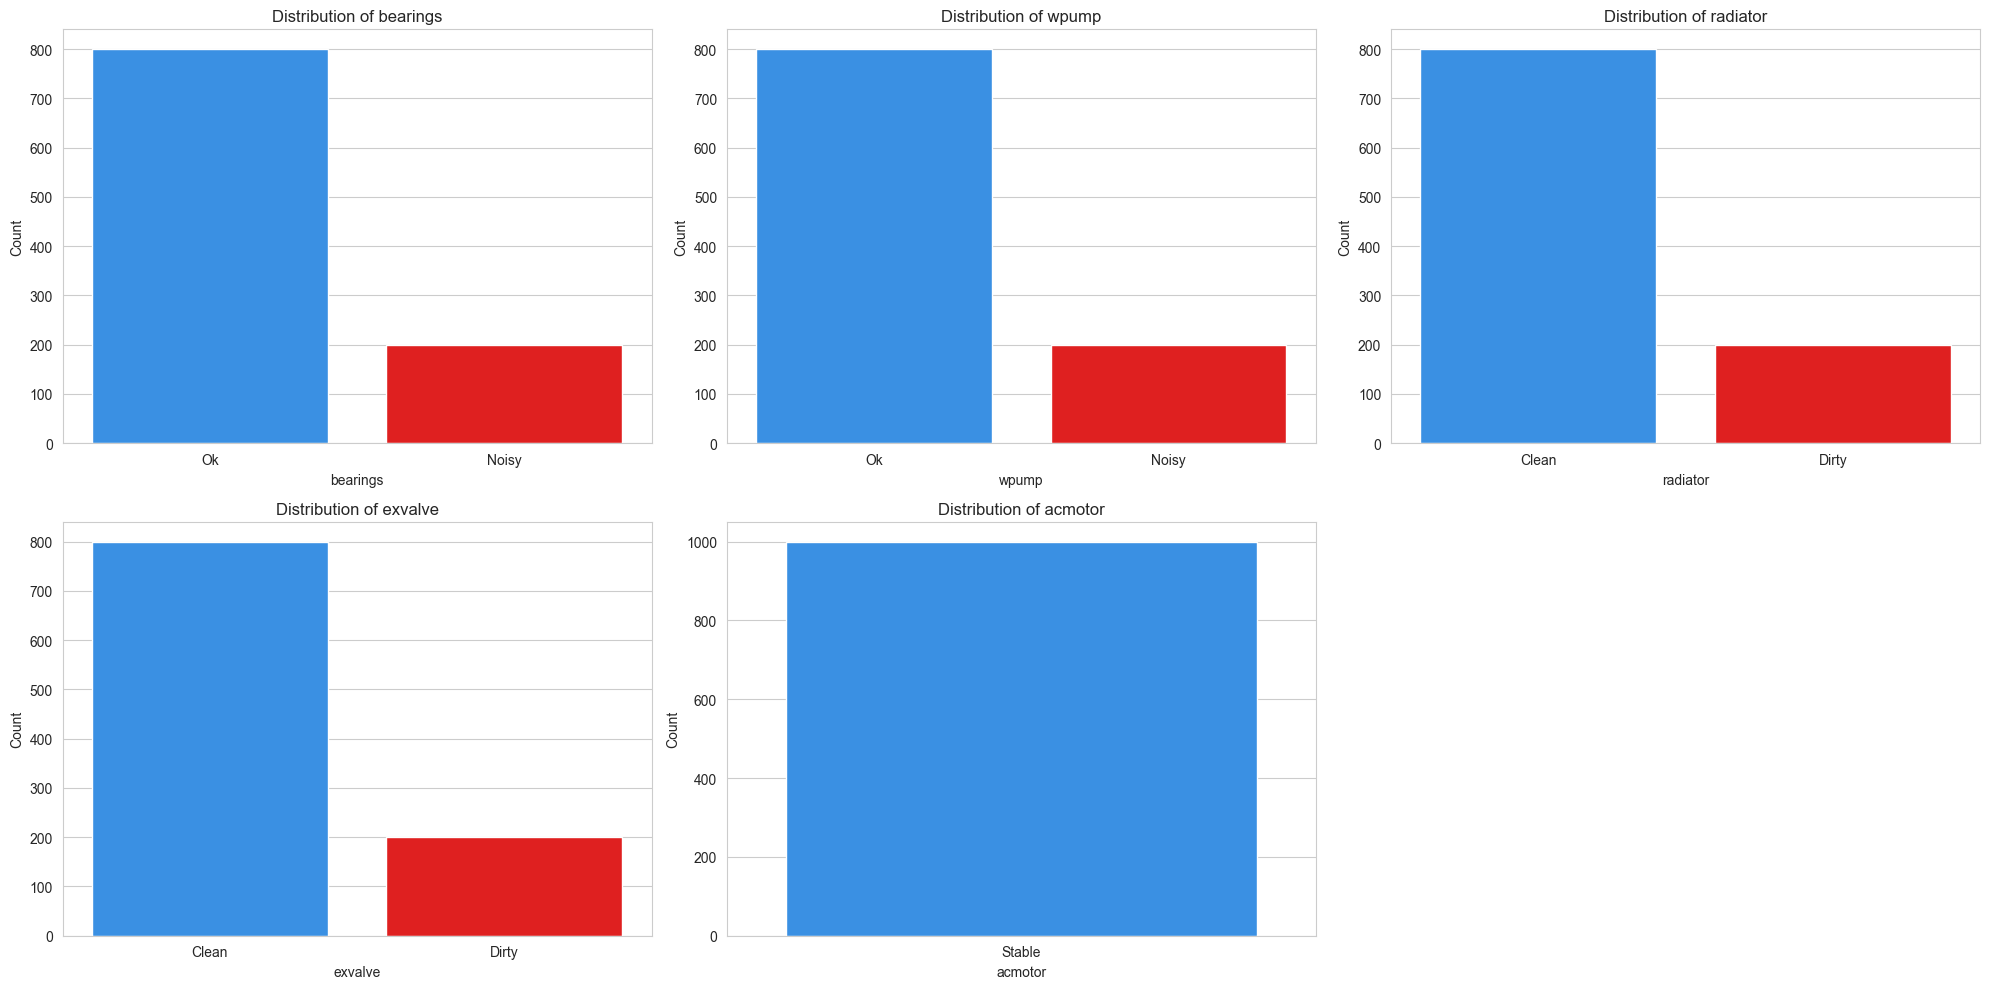

In [6]:
# Distribution
# Setting the style for the plots
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))

# Distribution of all object format values
object_columns = data.select_dtypes(include=['object']).columns

# Plotting count plots for each object column
for i, col in enumerate(object_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=data[col], palette=['dodgerblue', 'red'])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    if i == 5: # Break the loop after the fifth plot
        break

plt.tight_layout()
plt.show()

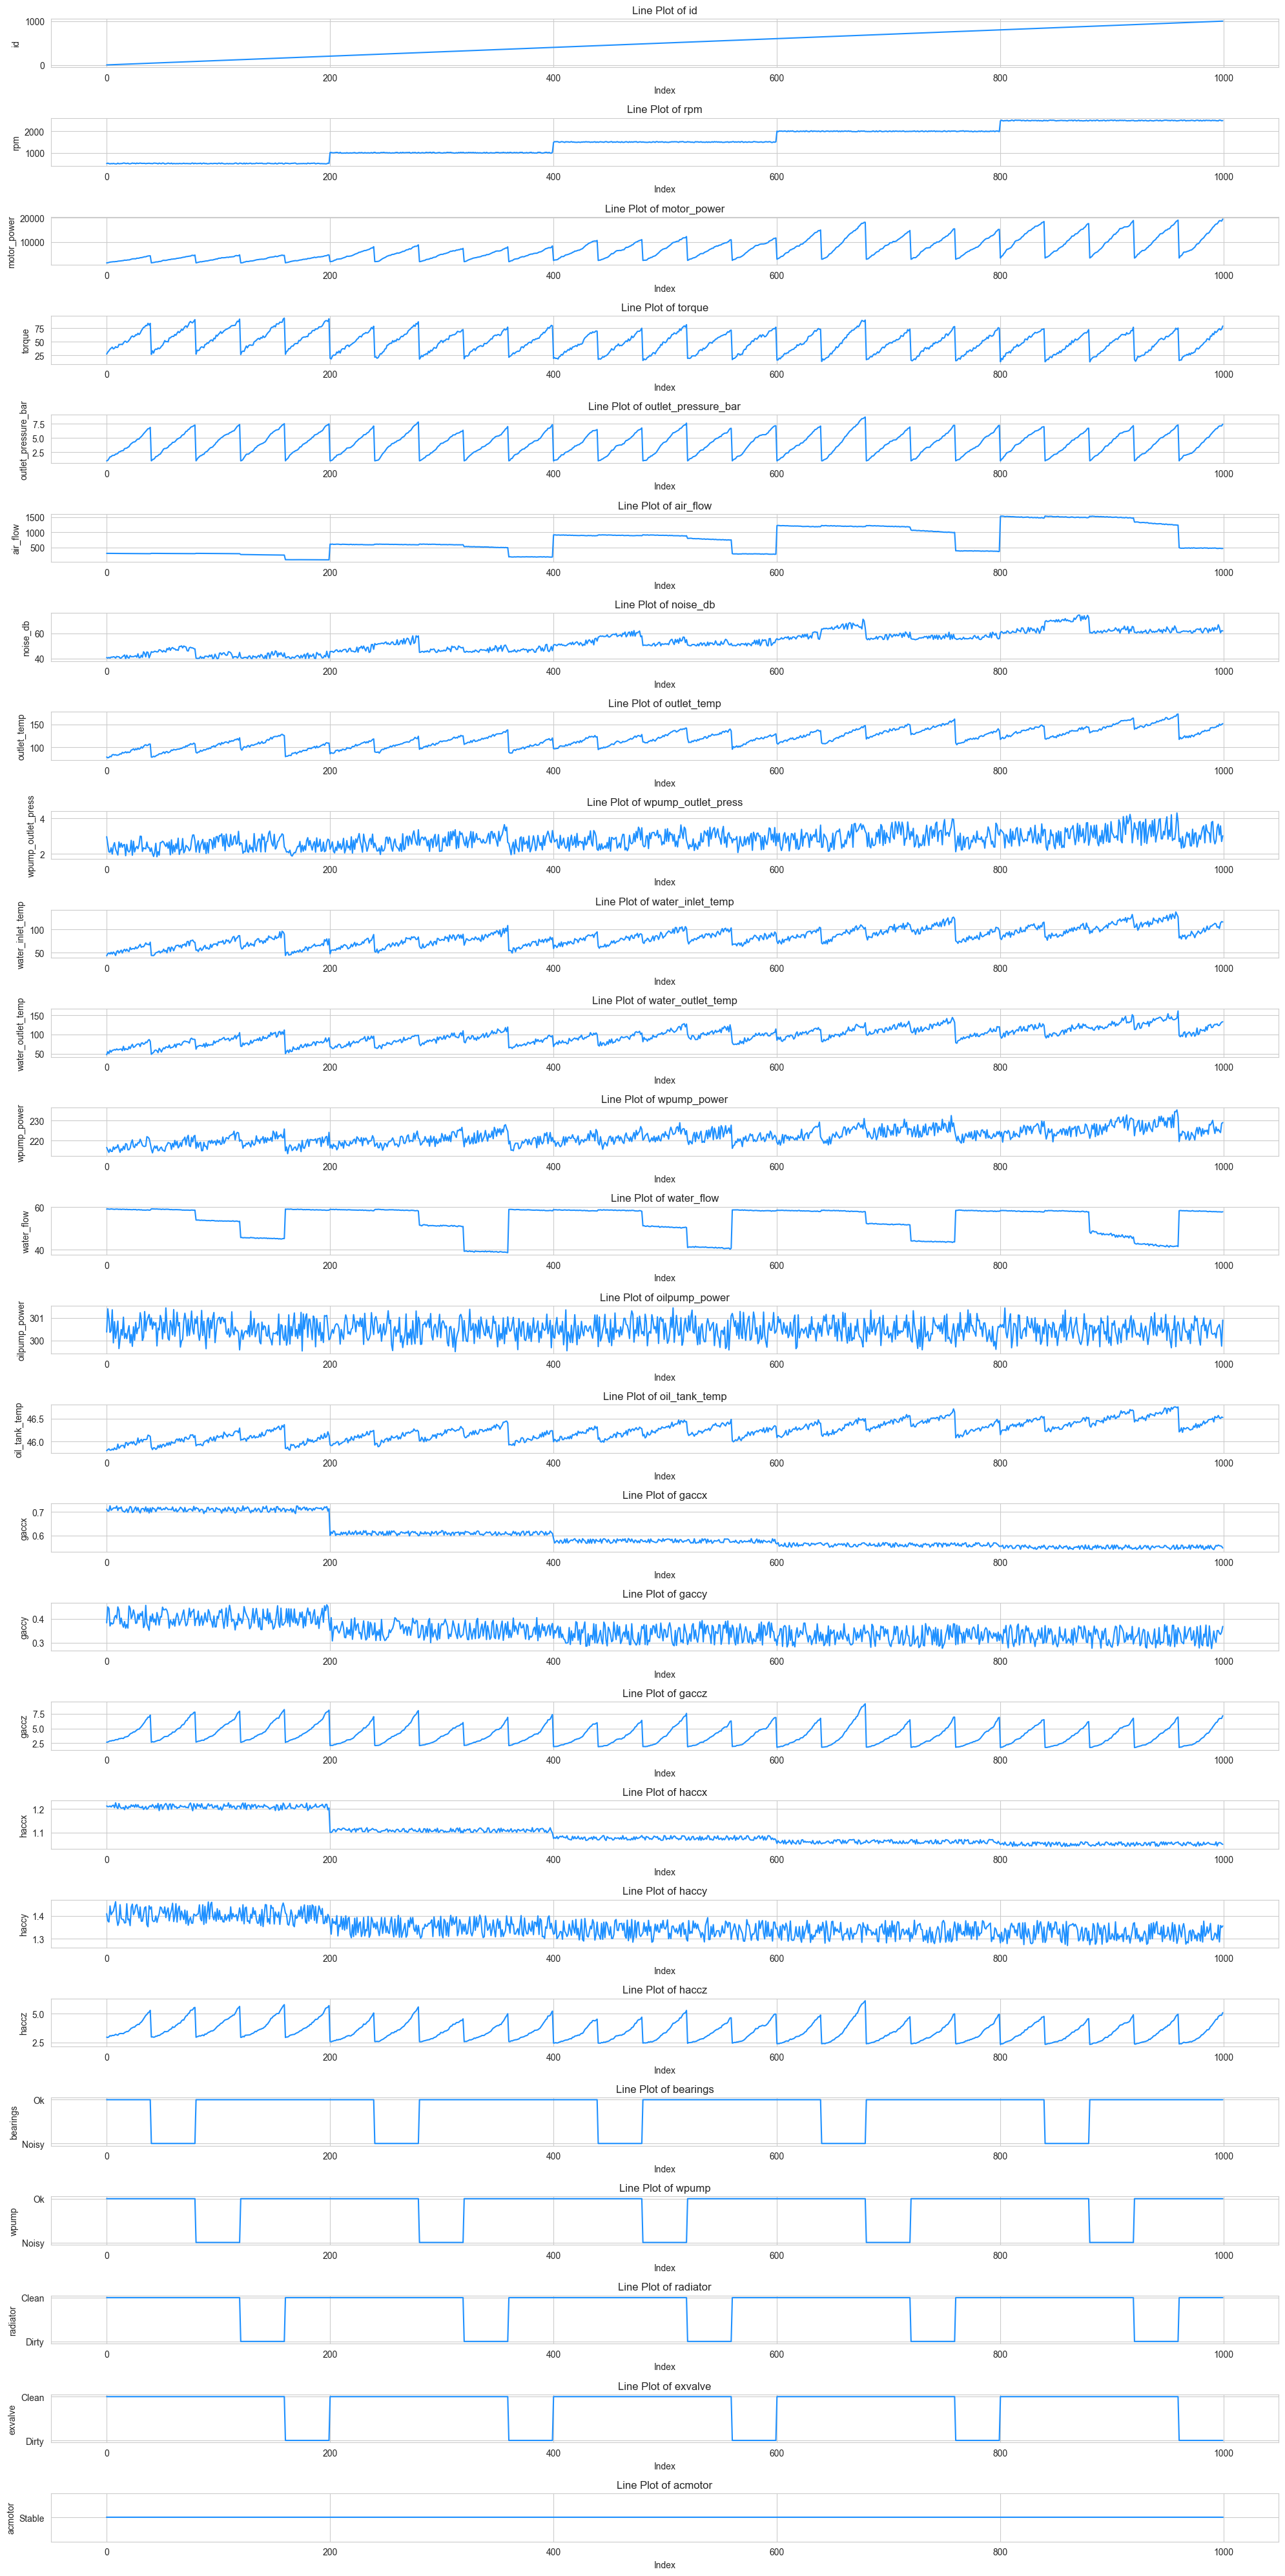

In [7]:
# Visualization

plt.figure(figsize=(20, 40))

# Plotting line plots for each numerical column
for i, col in enumerate(data.columns, 1):
    plt.subplot(len(data.columns), 1, i)
    sns.lineplot(data=data, x=data.index, y=col, color='dodgerblue')
    plt.title(f'Line Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

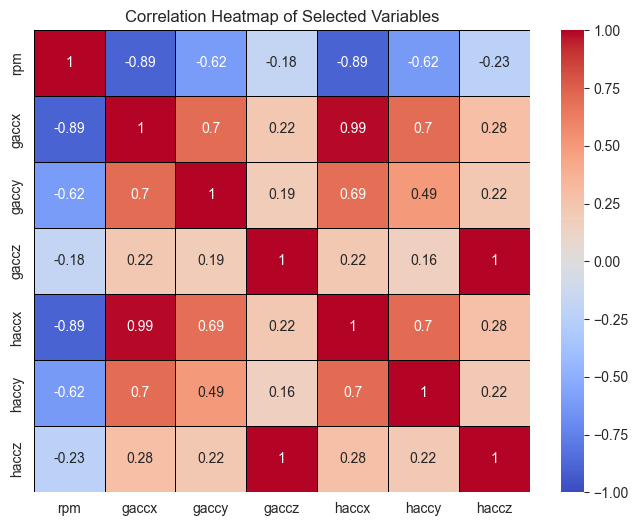

In [8]:
# Analyze data from vibration sensors 
# Calculate the correlation matrix for the selected columns
correlation_matrix = data[['rpm', 'gaccx', 'gaccy', 'gaccz', 'haccx', 'haccy', 'haccz']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

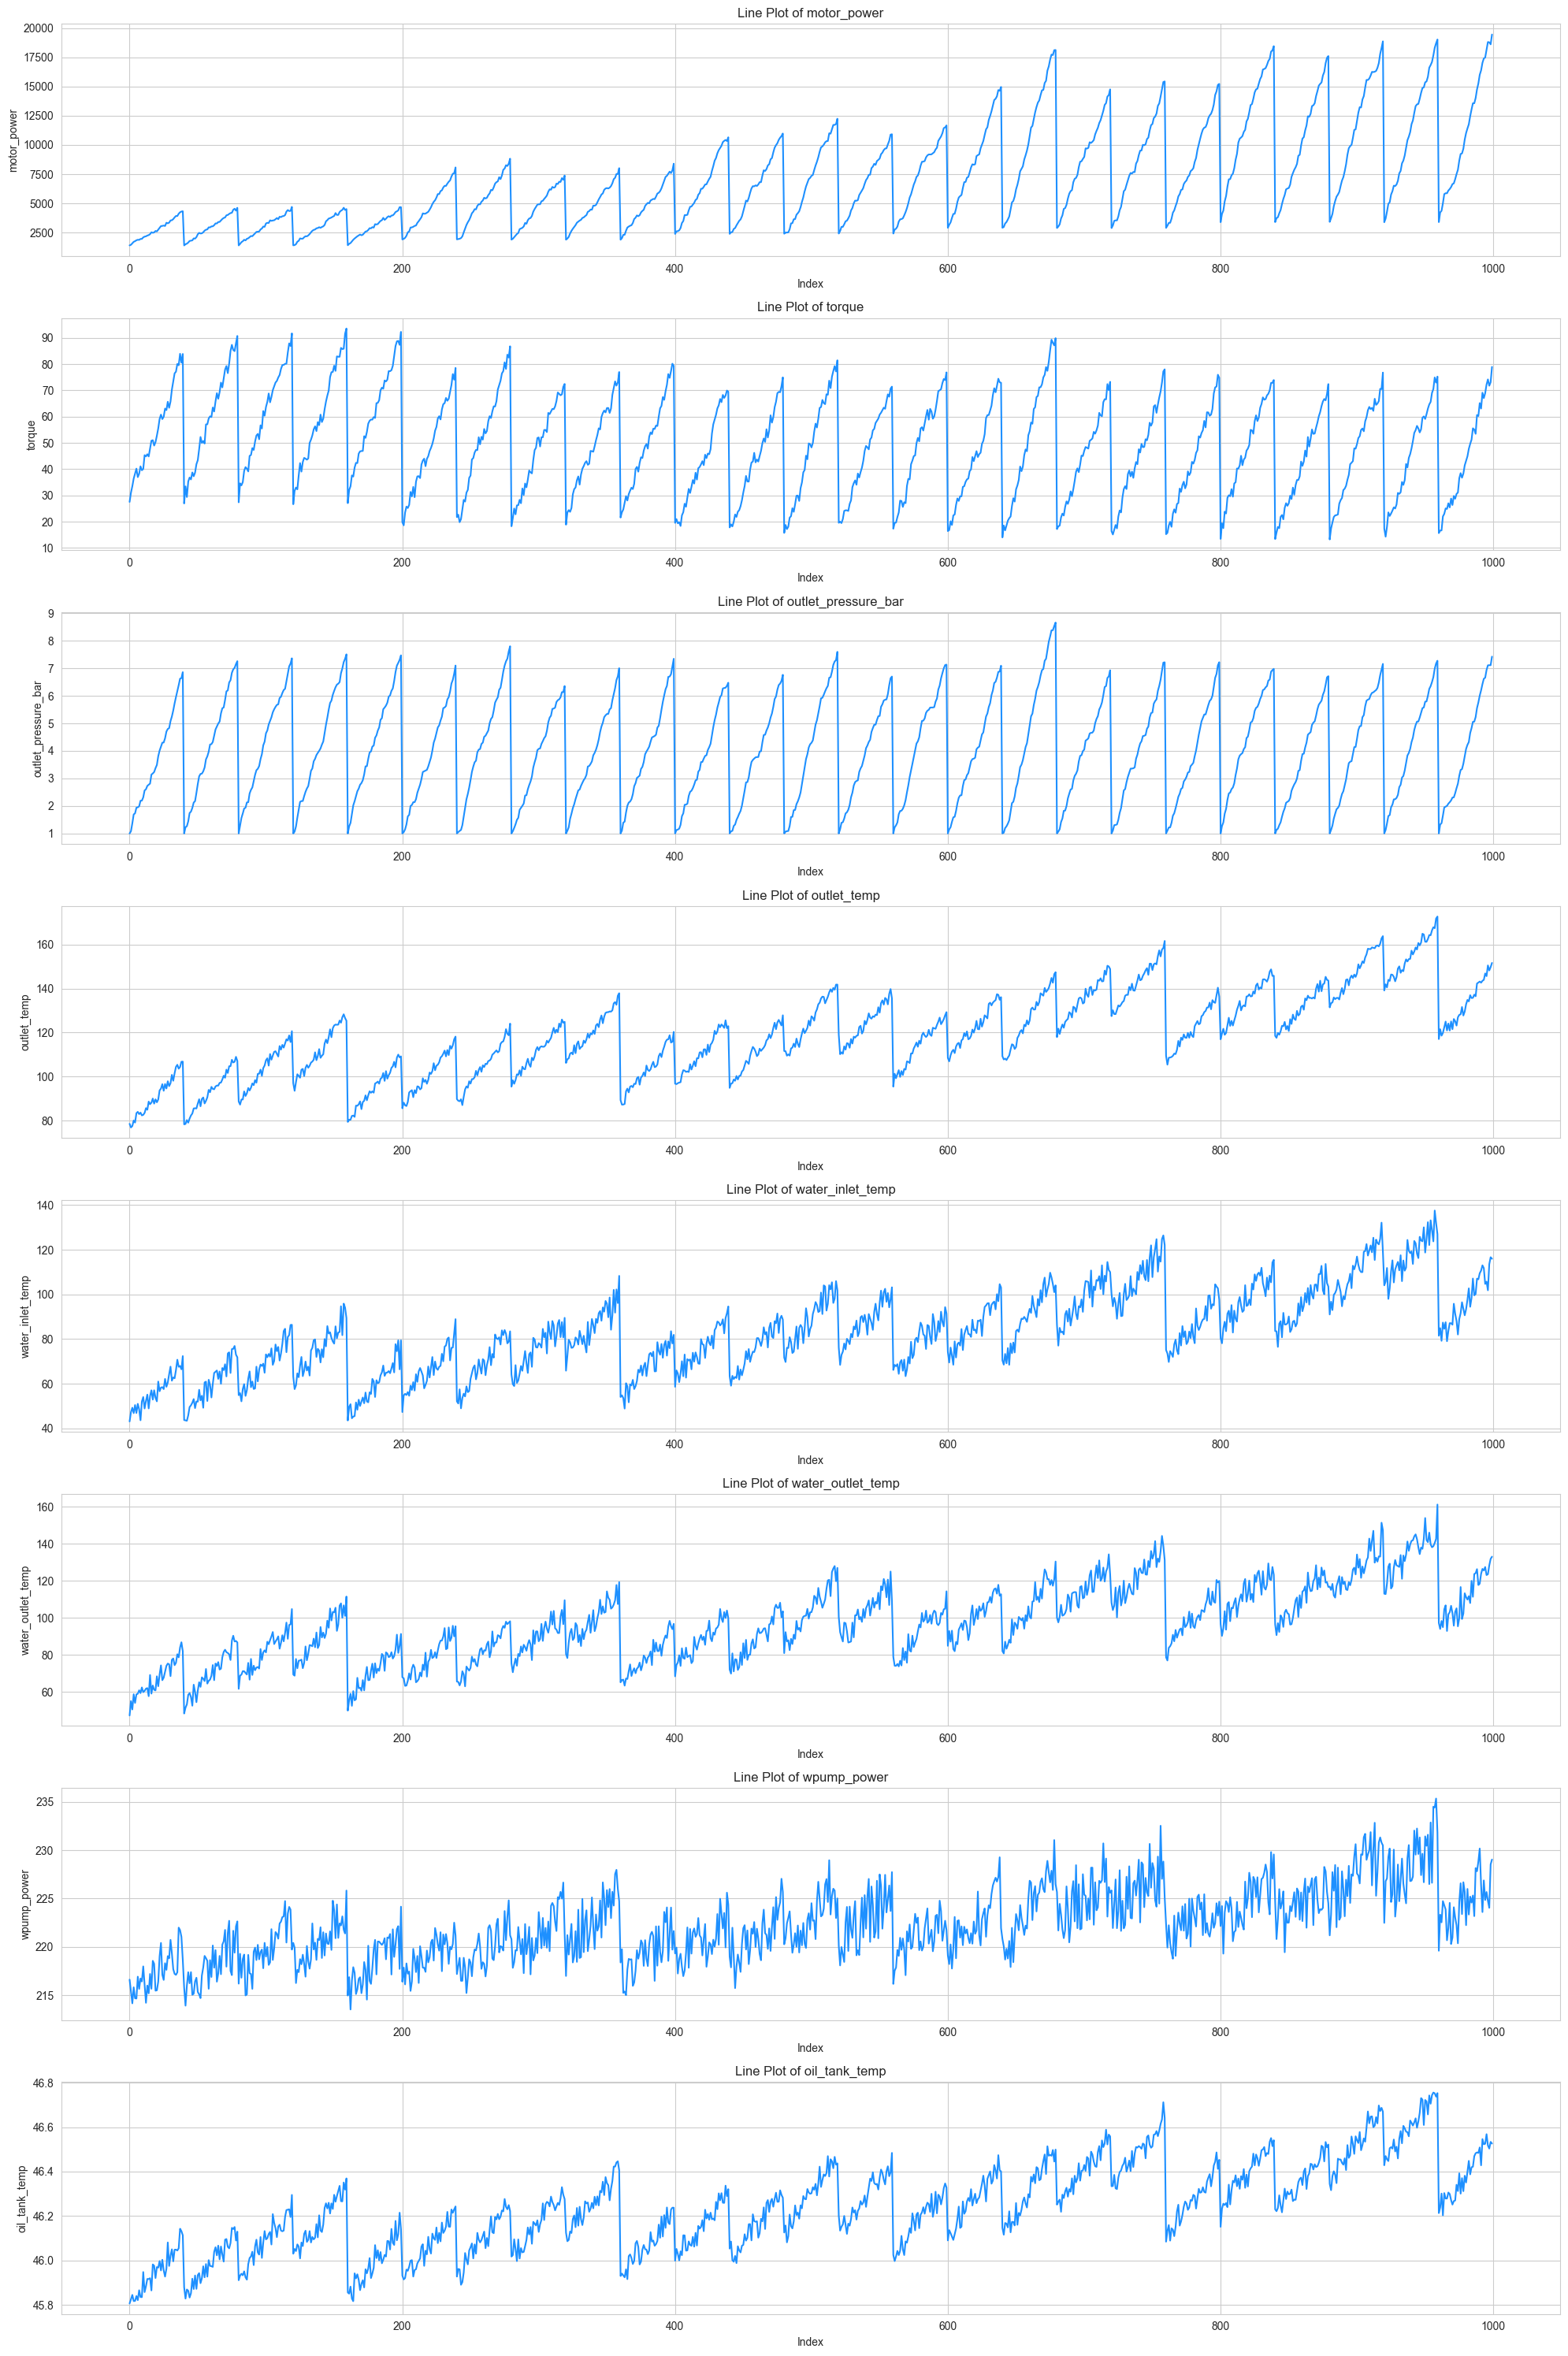

In [9]:
# 5 Analyze physically related values
# List of columns to exclude from the visualization
exclude_columns = ['id','acmotor','oilpump_power', 'wpump_outlet_press', 'gaccx', 'gaccy', 'gaccz', 'haccx', 'haccy', 'haccz', 'bearings', 'wpump', 'radiator','exvalve', 'acmotor','water_flow', 'rpm','air_flow', 'noise_db']

# Filtered dataset excluding the specified columns
filtered_data = data.drop(columns=exclude_columns)

# Visualizing line plots for the filtered columns
plt.figure(figsize=(20, 30))
for i, col in enumerate(filtered_data.columns, 1):
    plt.subplot(len(filtered_data.columns), 1, i)
    sns.lineplot(data=filtered_data, x=filtered_data.index, y=col, color='dodgerblue')
    plt.title(f'Line Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

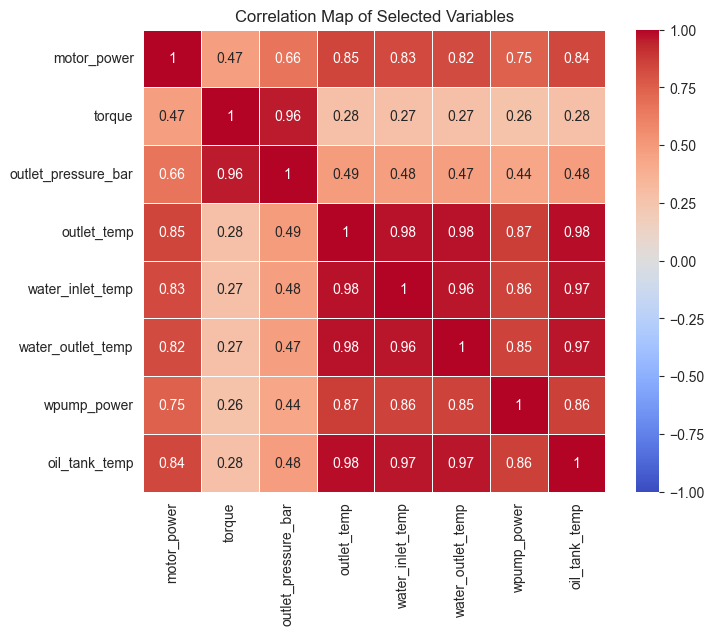

In [10]:
# Correlation between physically related values

# Filtered dataset excluding the specified columns
filtered_data = data.drop(columns=exclude_columns)

# Calculate the correlation matrix for the selected columns
correlation_matrix_selected = filtered_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, square=True)
plt.title('Correlation Map of Selected Variables')
plt.show()

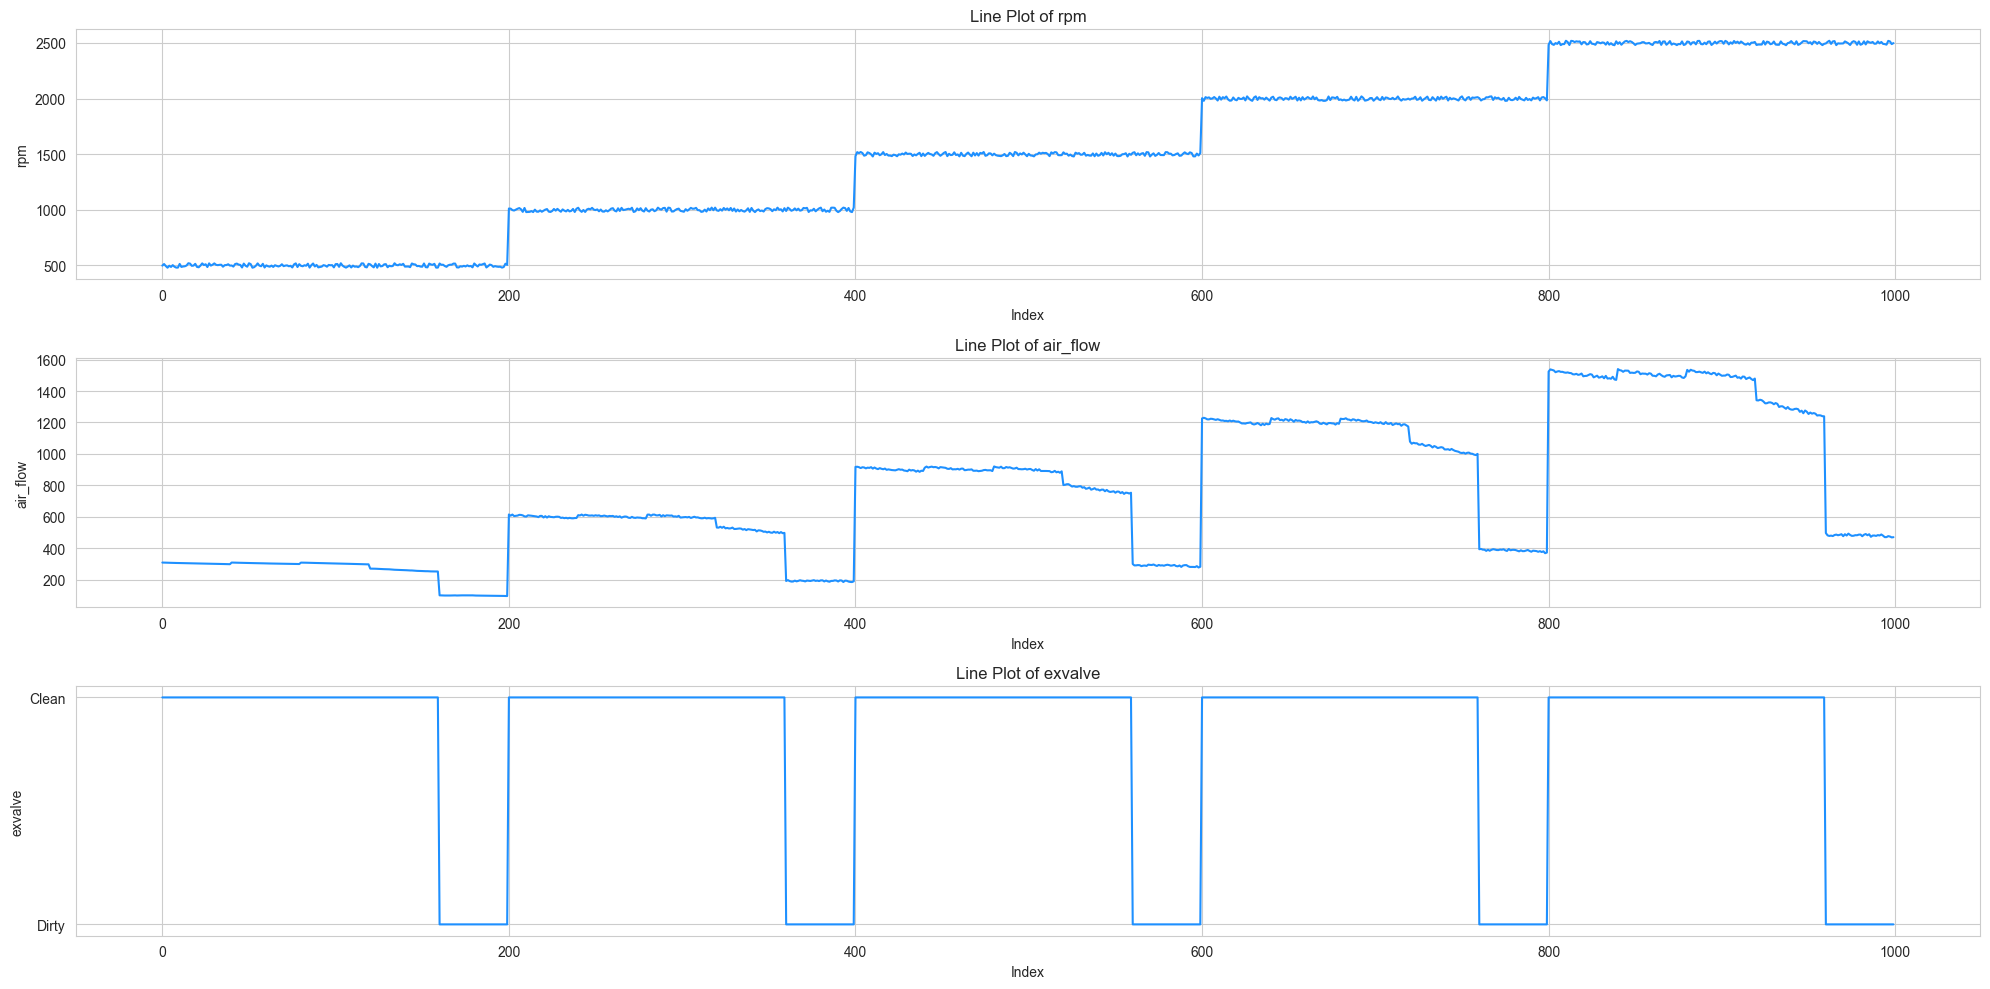

In [11]:
# Exvalve influence
# List of columns to the visualization
compared_columns = ['rpm','air_flow','exvalve']

# Filtered dataset excluding the specified columns
filtered_data = data[compared_columns]

# Visualizing line plots for the filtered columns
plt.figure(figsize=(20, 10))
for i, col in enumerate(filtered_data.columns, 1):
    plt.subplot(len(filtered_data.columns), 1, i)
    sns.lineplot(data=filtered_data, x=filtered_data.index, y=col, color='dodgerblue')
    plt.title(f'Line Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

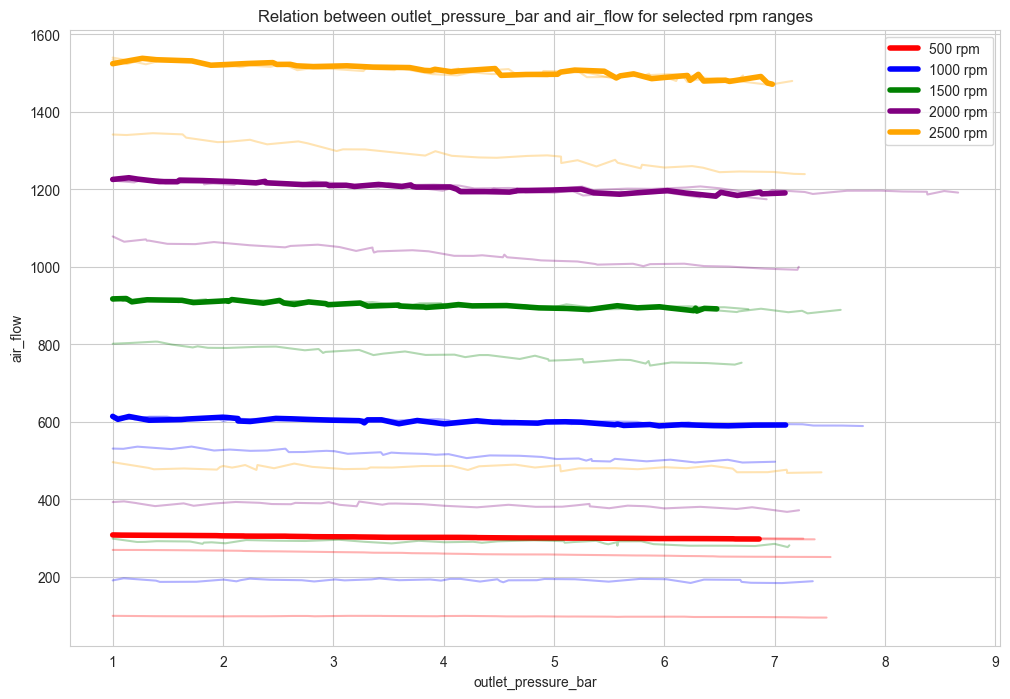

In [12]:
# Performance curves
# Define the major and minor ranges and their colors
major_ranges = [(0, 39), (200, 239), (400, 439), (600, 639), (800, 839)]
major_colors = ['red', 'blue', 'green', 'purple', 'orange']
minor_ranges = [(i, i+39) for i in range(40, data.shape[0], 40) if (i, i+39) not in major_ranges]
labels = ['500 rpm', '1000 rpm', '1500 rpm', '2000 rpm', '2500 rpm']

# Initialize a plot
plt.figure(figsize=(12, 8))

# Plot the data for each major range with solid colors and increased linewidth
for (start, end), color, label in zip(major_ranges, major_colors, labels):
    subset = data.iloc[start:end+1]
    plt.plot(subset['outlet_pressure_bar'], subset['air_flow'], color=color, label=label, linewidth=4)

# Plot the data for each minor range with transparent colors
for (start, end) in minor_ranges:
    subset = data.iloc[start:end+1]
    # Determine the color based on the major range
    color_idx = start // 200
    plt.plot(subset['outlet_pressure_bar'], subset['air_flow'], color=major_colors[color_idx], alpha=0.3)

# Add title, labels, and legend
plt.title('Relation between outlet_pressure_bar and air_flow for selected rpm ranges')
plt.xlabel('outlet_pressure_bar')
plt.ylabel('air_flow')
plt.legend()
plt.grid(True)
plt.show()

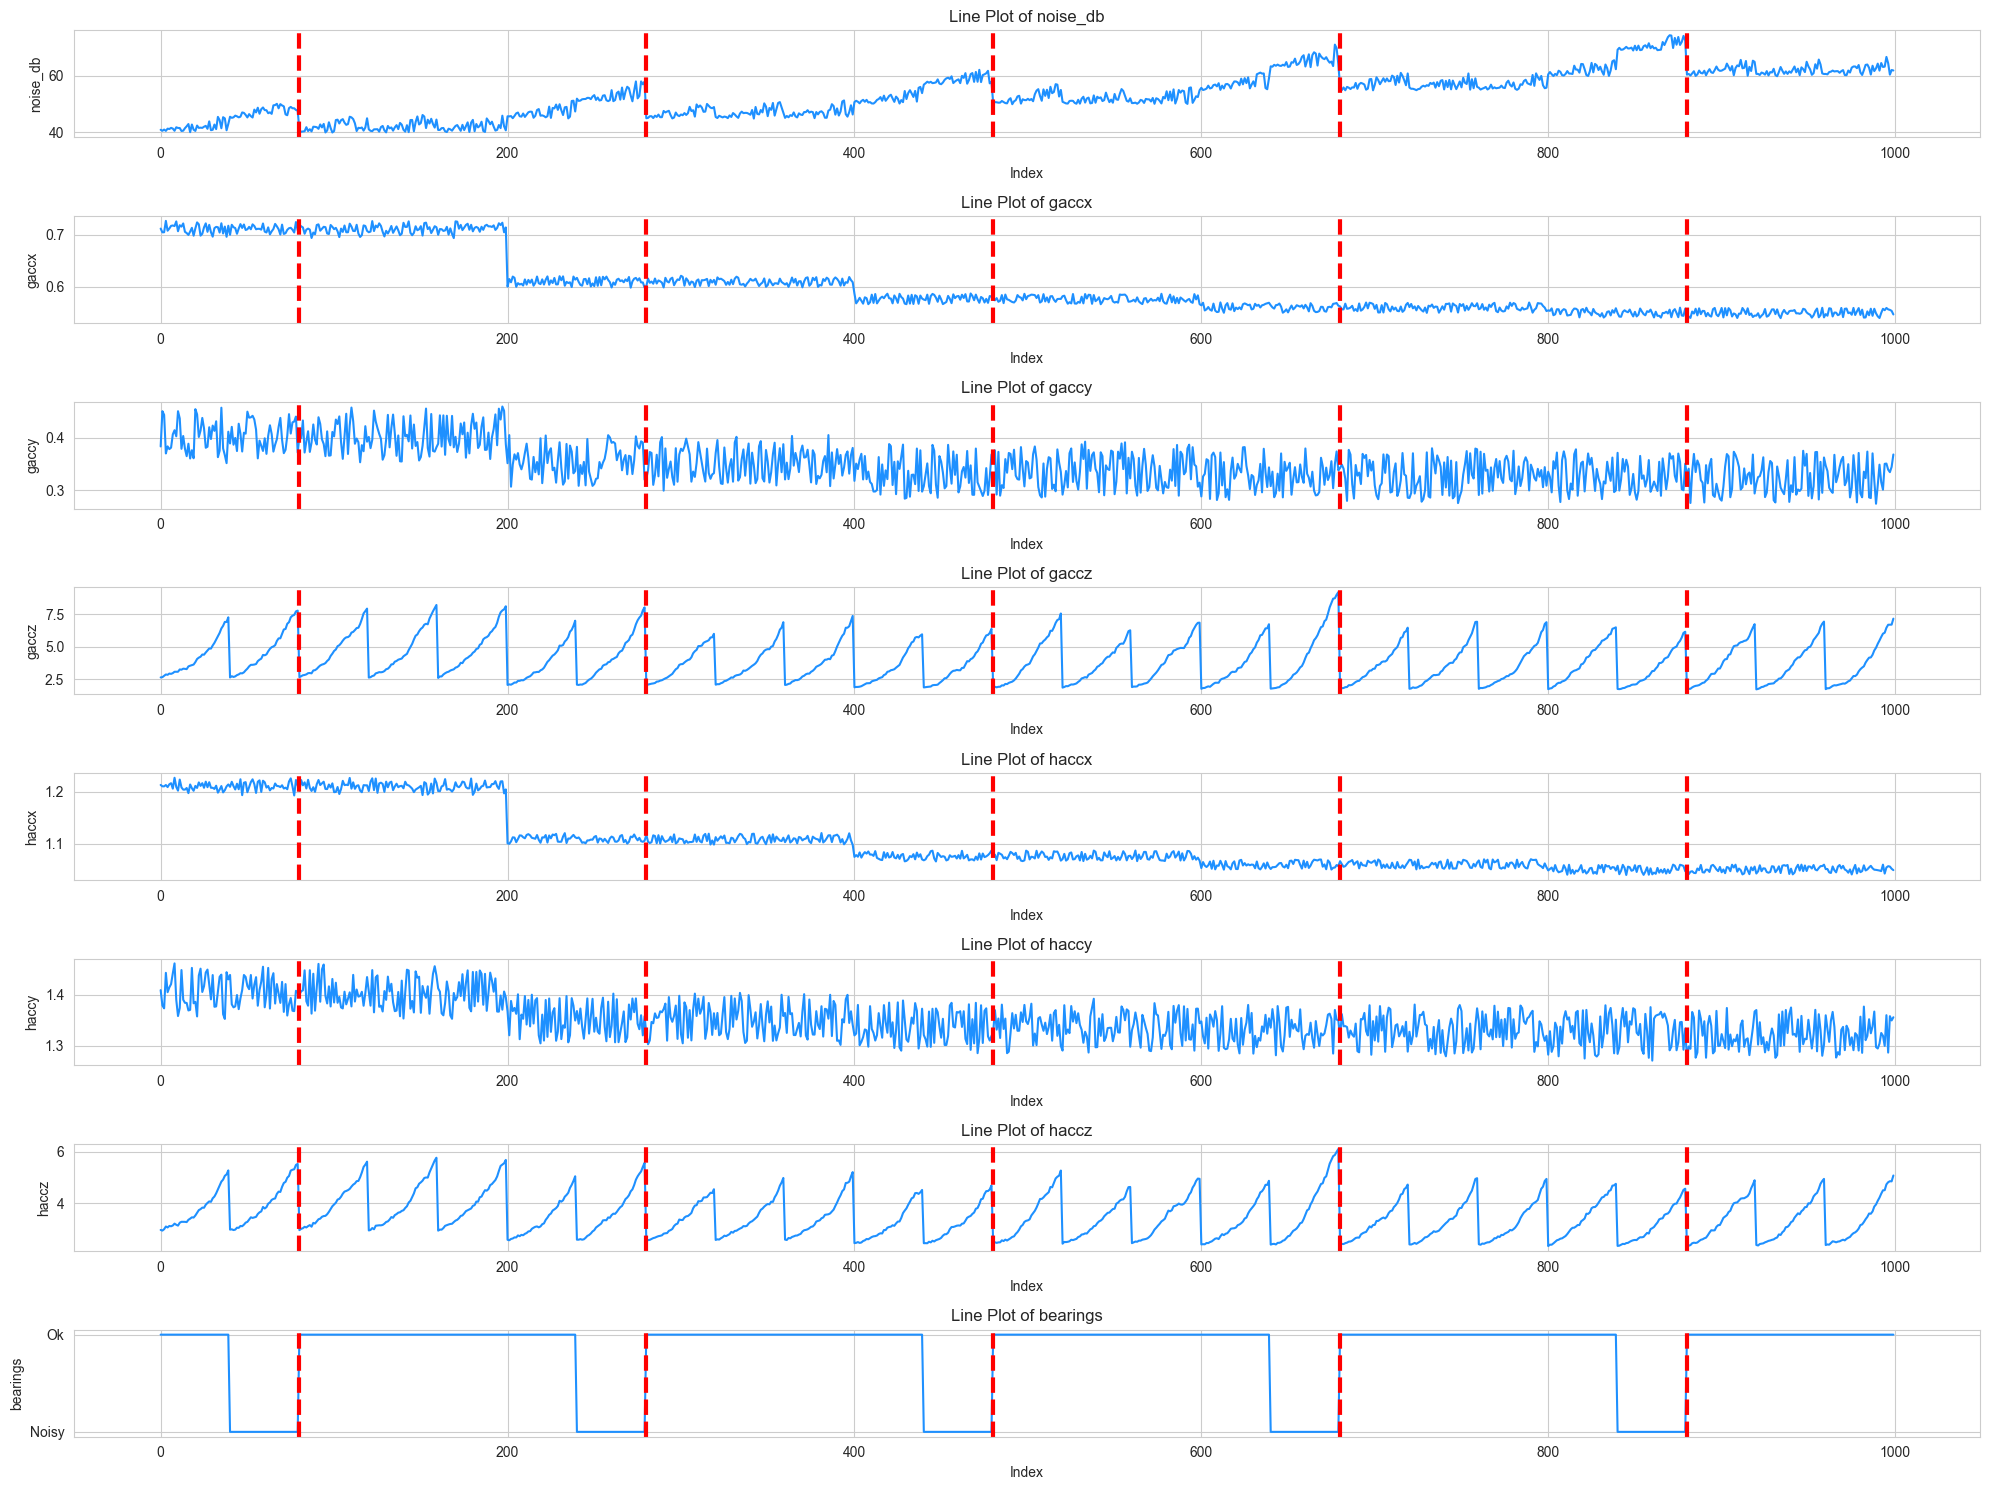

In [13]:
# Bearings influence
# List of columns to the visualization
compared_columns = ['noise_db','gaccx', 'gaccy', 'gaccz', 'haccx', 'haccy', 'haccz','bearings']

# Filtered dataset excluding the specified columns
filtered_data = data[compared_columns]

# Visualizing line plots for the filtered columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(filtered_data.columns, 1):
    plt.subplot(len(filtered_data.columns), 1, i)
    sns.lineplot(data=filtered_data, x=filtered_data.index, y=col, color='dodgerblue')
    plt.title(f'Line Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    # Adding horizontal red lines at every 80, 280, 480, and so on
    for x_val in range(80, filtered_data.shape[0], 200):
        plt.axvline(x=x_val, color='red', linestyle='--', linewidth=3)

plt.tight_layout()
plt.show()

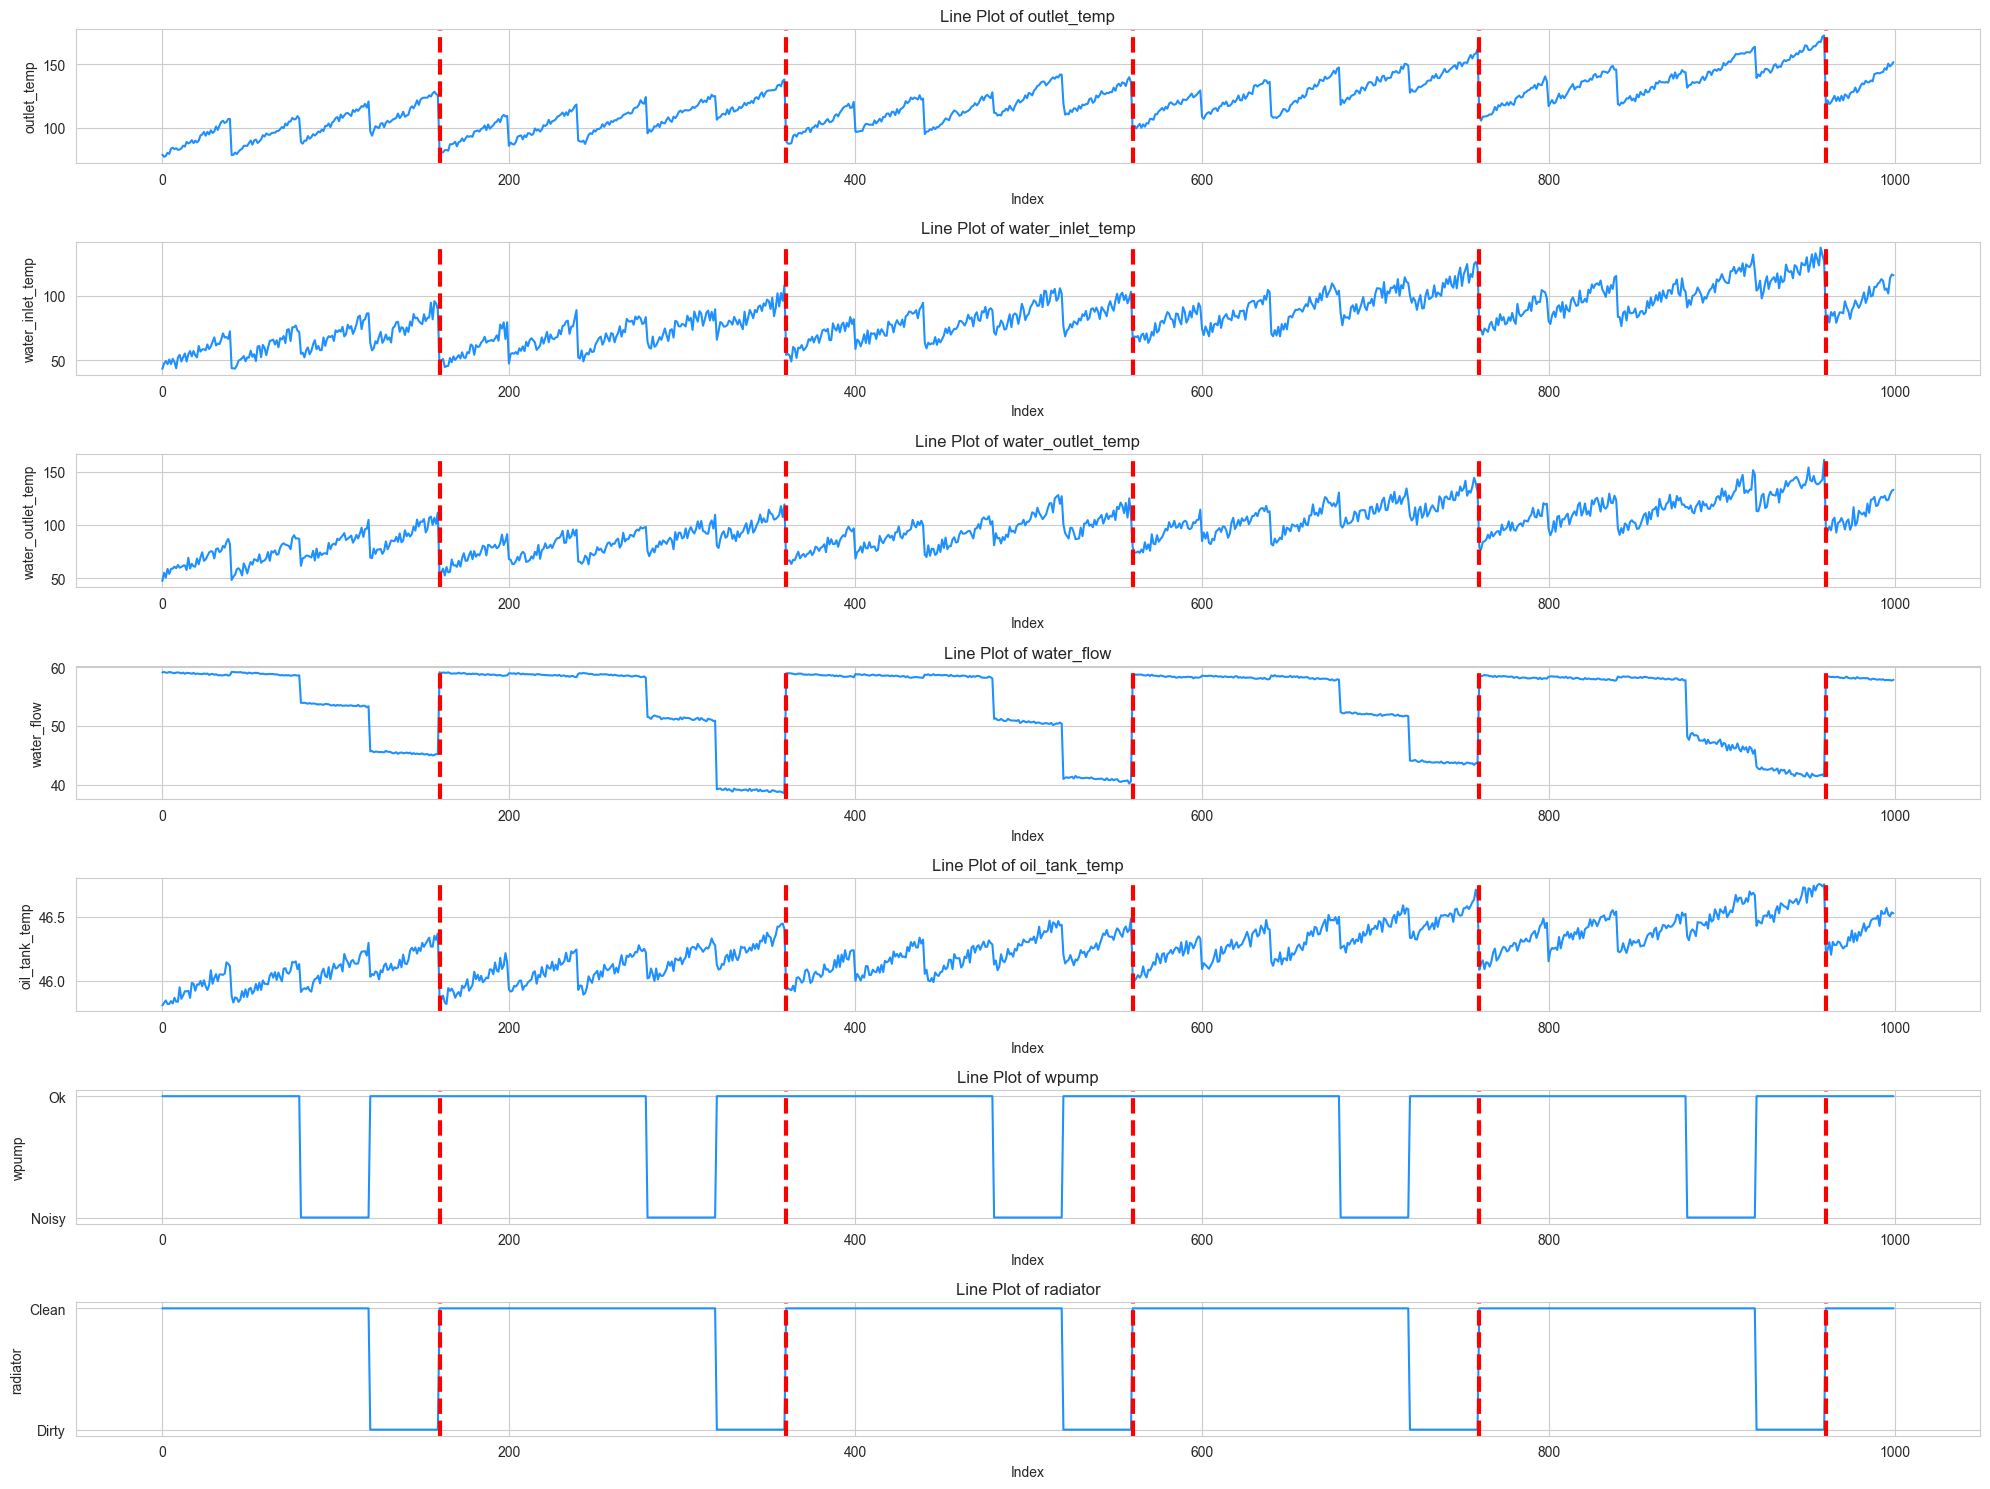

In [14]:
# Water pump and radiator influence
# List of columns to the visualization
compared_columns = ['outlet_temp','water_inlet_temp', 'water_outlet_temp', 'water_flow', 'oil_tank_temp', 'wpump', 'radiator']

# Filtered dataset excluding the specified columns
filtered_data = data[compared_columns]

# Visualizing line plots for the filtered columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(filtered_data.columns, 1):
    plt.subplot(len(filtered_data.columns), 1, i)
    sns.lineplot(data=filtered_data, x=filtered_data.index, y=col, color='dodgerblue')
    plt.title(f'Line Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    # Adding horizontal red lines at every 160, 360, 560, and so on
    for x_val in range(160, filtered_data.shape[0], 200):
        plt.axvline(x=x_val, color='red', linestyle='--', linewidth=3)

plt.tight_layout()
plt.show()

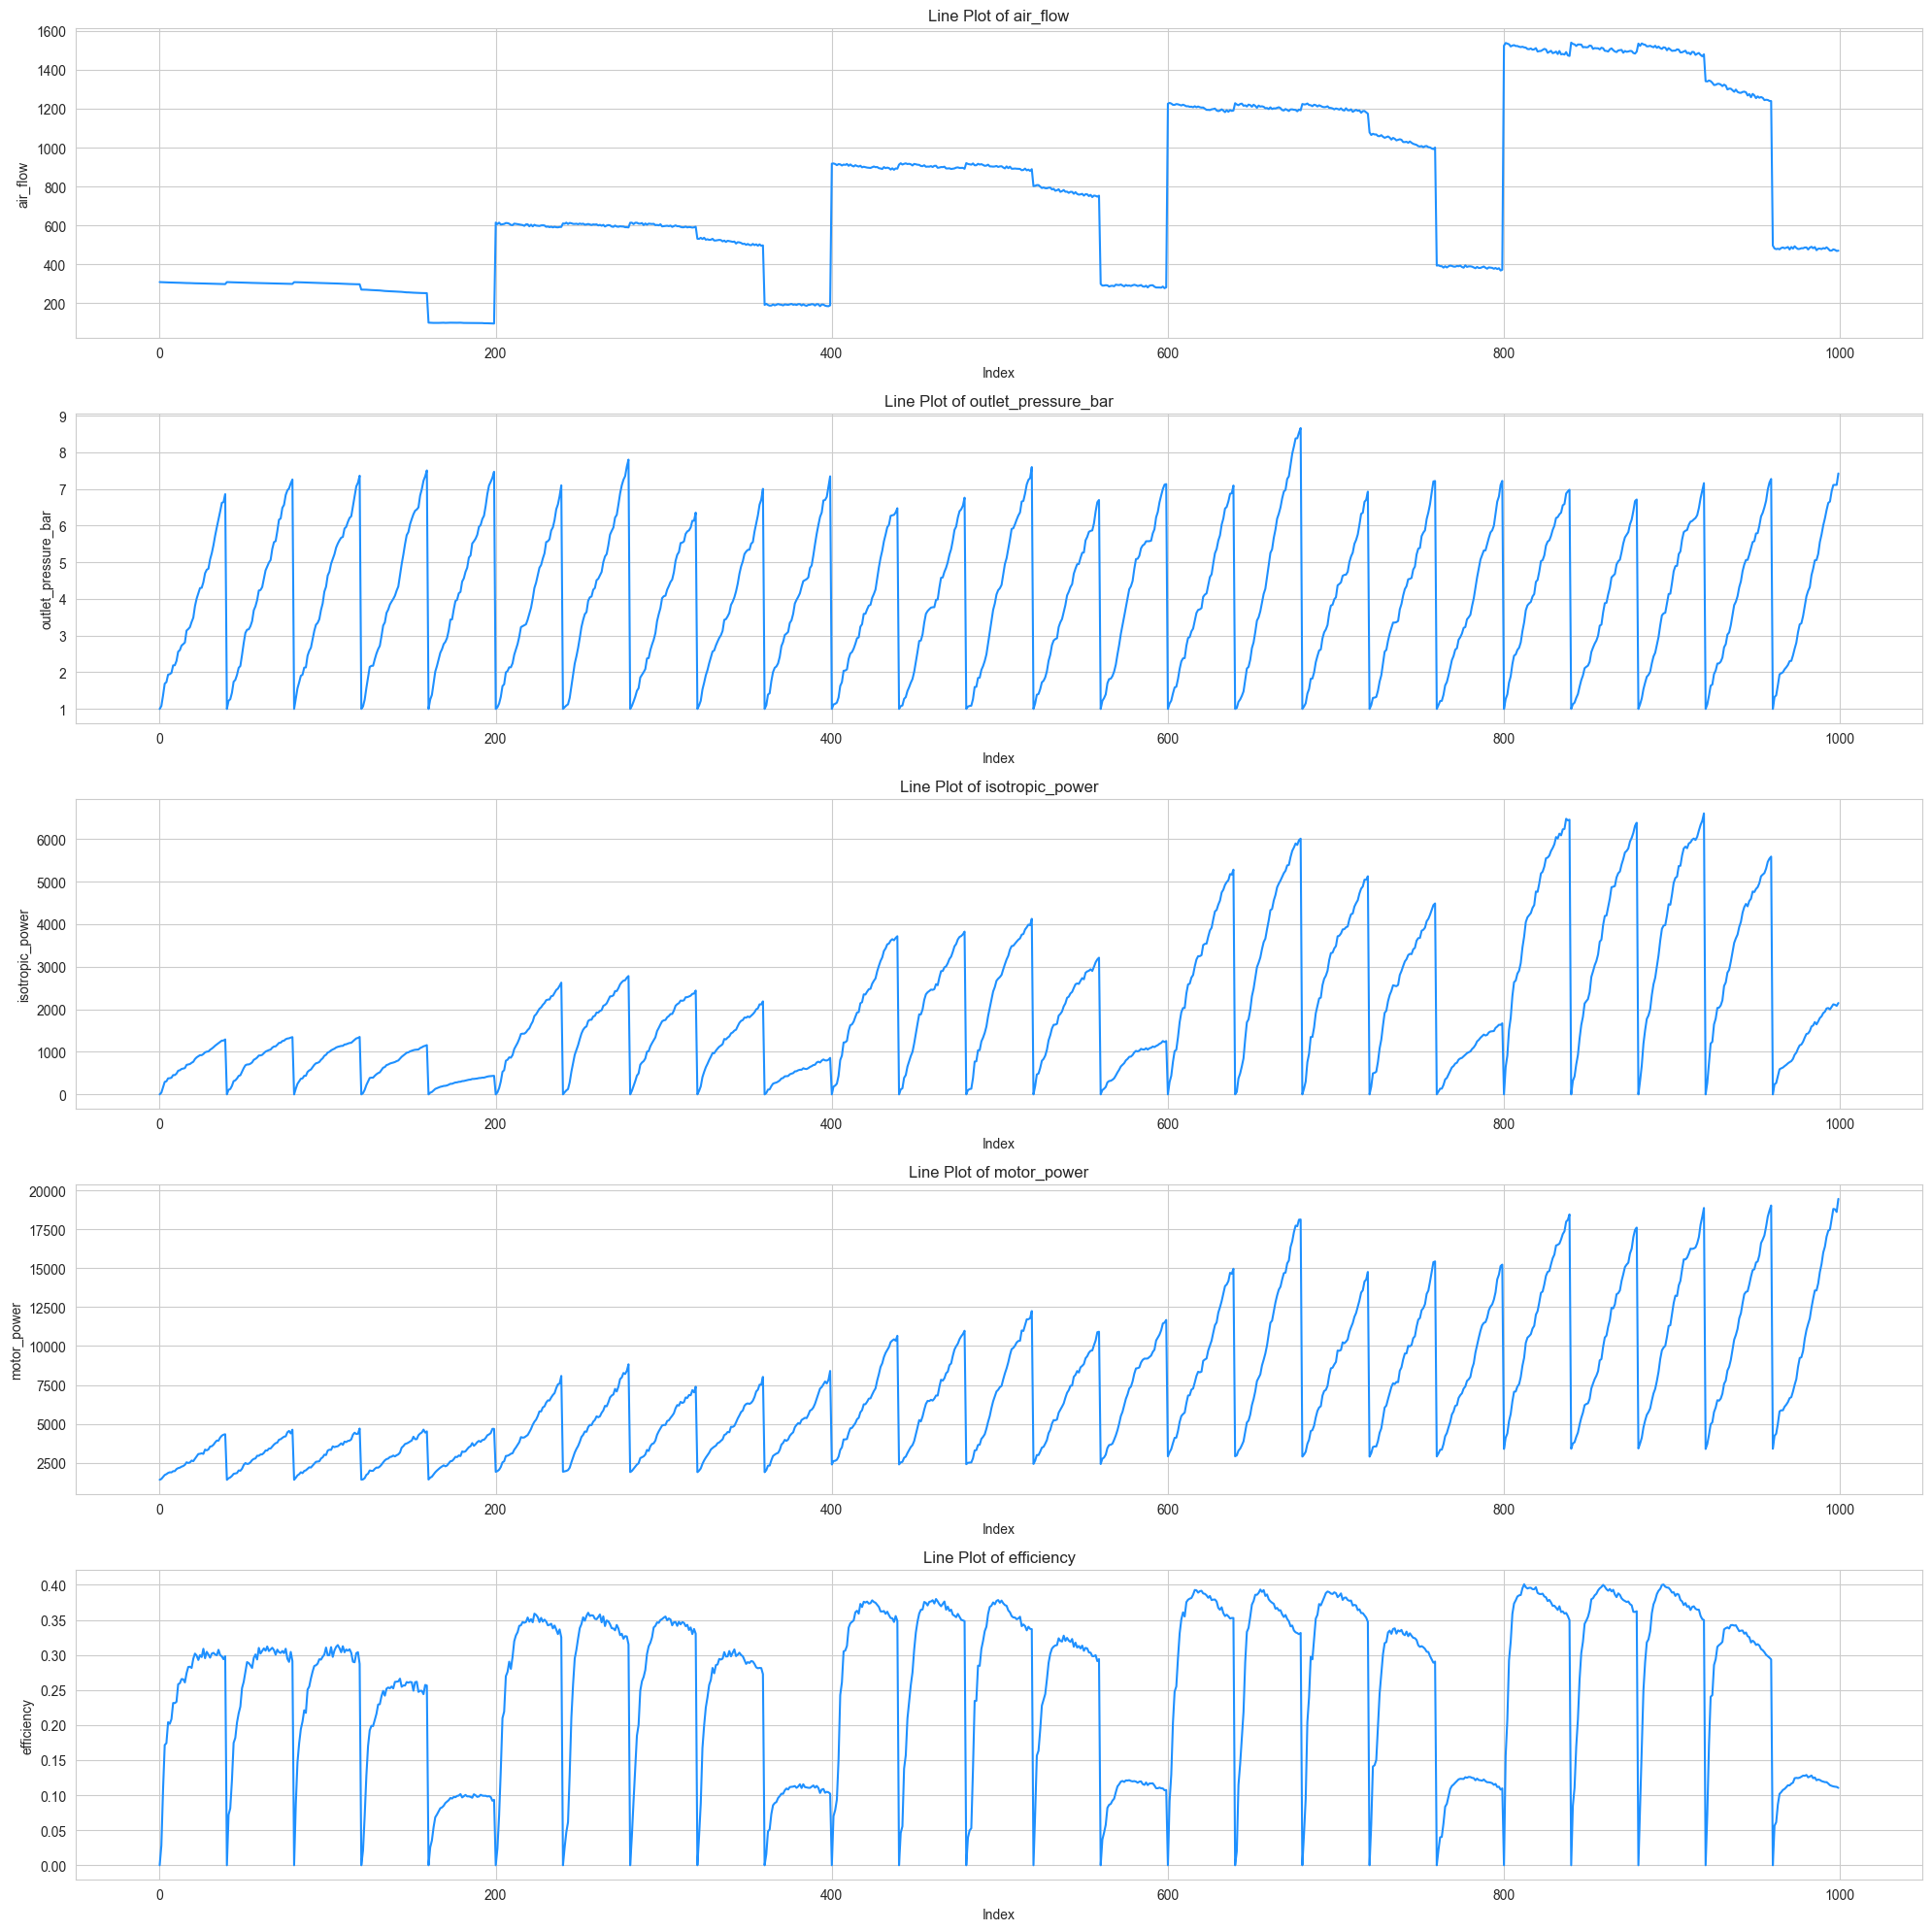

In [15]:
# Advance calculating data 
# Calculating isotropic power and efficiency
data['isotropic_power'] = (1.4/0.4)*data['air_flow']*0.00001666*101330*(data['outlet_pressure_bar']**(0.4/1.4)-1)
data['efficiency']=data['isotropic_power']/data['motor_power']

# List of columns to exclude from the visualization
compared_columns = ['air_flow','outlet_pressure_bar','isotropic_power','motor_power','efficiency']

# Filtered dataset excluding the specified columns
filtered_data = data[compared_columns]

# Visualizing line plots for the filtered columns
plt.figure(figsize=(20, 20))
for i, col in enumerate(filtered_data.columns, 1):
    plt.subplot(len(filtered_data.columns), 1, i)
    sns.lineplot(data=filtered_data, x=filtered_data.index, y=col, color='dodgerblue')
    plt.title(f'Line Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()